<a href="https://colab.research.google.com/github/Akshayrajnadar/Wine_quality_prediction/blob/master/Wine_quality_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Dataset
The wine dataset consists of 13 parameters that describe different characteristics of the wine. These parameters are used to predict the quality of the wine, which is categorized into three classes ranging from 1 to 3. Here's a description of the 13 parameters typically found in wine datasets:

1. Alcohol: The percentage of alcohol content in the wine.
2. Malic Acid: The amount of malic acid present in the wine, which contributes to its tartness.
3. Ash: The total ash content, representing the mineral content of the wine.
4. Alkalinity of Ash: This parameter measures the alkalinity or the pH level of the ash.
5. Magnesium: The amount of magnesium present in the wine.
6. Total Phenols: The total concentration of phenolic compounds in the wine, which contributes to its color and flavor.
7. Flavanoids: The concentration of flavonoids, a subclass of phenolic compounds, in the wine.
8. Nonflavanoid Phenols: The concentration of non-flavonoid phenols, another subclass of phenolic compounds, in the wine.
9. Proanthocyanins: The concentration of proanthocyanins, which are antioxidants found in grapes and red wines.
10. Color Intensity: The intensity of color in the wine, typically determined by spectrophotometry.
11. Hue: The hue or shade of the wine, which is also related to its color.
12. OD280/OD315 of Diluted Wines: This parameter represents the ratio of optical density at 280 nm to that at 315 nm and provides information about the wine's protein content.
13. Proline: The concentration of proline, an amino acid, in the wine.

The quality of the wine is classified into three classes:

Class 1: Low-quality wine.

Class 2: Medium-quality wine.

Class 3: High-quality wine.

So, here we are going to make a RNN model to predict the quality of wine using this perameters. First we wil import all the required librarys and then we will clean the data for further processing.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import datasets, models, layers
from keras.utils import np_utils
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

# Importing wine dataset using Pandas

In [ ]:
data =  pd.read_csv('/content/wine.csv')
data.head()

,Outcome,Alcohol,Malic acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 14)

# Creating input data from the original dataset

In [ ]:
X = data.drop('Outcome', axis=1)
print(X)

     Alcohol  Malic acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyan

# Creating output data from the original dataset

In [ ]:
Y = data['Outcome']
Y = Y.map({1:0, 2:1, 3:2}).astype(float).astype(int)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Outcome, Length: 178, dtype: int64


# Splitting the data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

# Using np_utils.to_categorical to making the output data a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [ ]:
Y_train = np_utils.to_categorical(Y_train, num_classes= 3)
print(Y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [ ]:
Y_test = np_utils.to_categorical(Y_test, num_classes=3)

In [ ]:
# mm = MinMaxScaler(feature_range=(0,1))
# X = mm.fit_transform(X_train)

# Making the model

In [ ]:
model = models.Sequential()
model.add(Input(shape=[13,]))

model.add(Dense(50, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))

model.add(Dense(3, activation='sigmoid'))

# Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Training the model

In [ ]:
history = model.fit(X_train, Y_train, epochs= 100, validation_data=(X_test,Y_test))

Epoch 1/100
4/4 [==============================] - 0s 32ms/step - loss: 0.8295 - accuracy: 0.6371 - val_loss: 0.6352 - val_accuracy: 0.7222
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6571 - accuracy: 0.7177 - val_loss: 0.7741 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6911 - accuracy: 0.7016 - val_loss: 0.7465 - val_accuracy: 0.6481
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6045 - accuracy: 0.6935 - val_loss: 0.5992 - val_accuracy: 0.6852
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5813 - accuracy: 0.7177 - val_loss: 0.5906 - val_accuracy: 0.7963
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5906 - accuracy: 0.6935 - val_loss: 0.5851 - val_accuracy: 0.7407
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6416 - accuracy: 0.6774 - val_loss: 0.7702 - val_accuracy: 0.6852
Epoch 8/100
4/4 [===

# Plotting the output epochs vs accuracy and validation accuracy

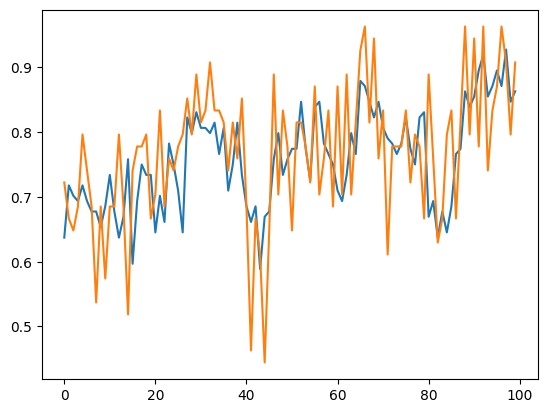

In [ ]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
xlabel = 'Epochs'
ylabel = 'Accuracy'
plt.show()

# Graph of eochs vs loss

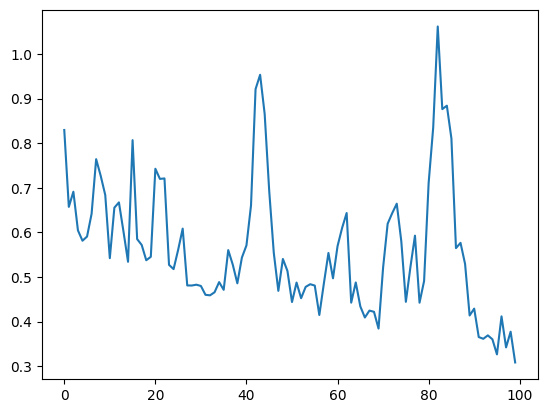

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
# plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
xlabel = 'Epochs'
ylabel = 'loss'
plt.show()